In [31]:
#import requests
import pandas as pd
import numpy as np

#import os
#from dotenv import load_dotenv
 

import src.eda_cleaning as eda
import src.scraping as scrp


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px





## Scraping Movie database API

In [32]:
#!python "src\scraping.py"

In [33]:
imbd_table = pd.read_csv("csv\imbd_table.csv", index_col=0)
imbd_table

,imbd_rating,imbd_votecount,imbd_title,year
0,9.3,2695887,The Shawshank Redemption,1994
1,9.2,1870922,The Godfather,1972
2,9.0,2669915,The Dark Knight,2008
3,9.0,1279091,The Godfather: Part II,1974
4,9.0,796537,De 12 gezworenen,1957
...,...,...,...,...
95,8.3,159979,M - Eine Stadt sucht einen Mörder,1931
96,8.3,296955,Lawrence of Arabia,1962
97,8.3,331183,North by Northwest,1959
98,8.3,405906,Vertigo,1958


## Rotten tomatoes Movie csv

In [34]:
rotten_tomatoes = pd.read_csv(r"csv\rotten_tomatoes_movies.csv")

In [35]:
rotten_tomatoes.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [73]:
rotten_tomatoes.info()
#nulls for only numerical values
print("\n ############### NULL % ################\n")
print(rotten_tomatoes[rotten_tomatoes.columns].isnull().sum()/(rotten_tomatoes.shape[0]))

print("\n ############### Numerical Variables Sumarry Statistics ################\n")
rotten_tomatoes.describe().round(2)
      
                                                    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   movie_title                       17712 non-null  object 
 1   content_rating                    17712 non-null  object 
 2   genres                            17693 non-null  object 
 3   directors                         17518 non-null  object 
 4   authors                           16170 non-null  object 
 5   original_release_date             16546 non-null  object 
 6   runtime                           17398 non-null  float64
 7   production_company                17213 non-null  object 
 8   tomatometer_status                17668 non-null  object 
 9   tomatometer_rating                17668 non-null  float64
 10  tomatometer_count                 17668 non-null  float64
 11  audience_rating                   17416 non-null  float64
 12  audi

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17398.00,17668.00,17668.00,17416.00,17415.00,17712.00,17712.00,17712.00
mean,102.21,60.88,57.14,60.55,143940.07,14.59,36.37,20.70
std,18.70,28.44,68.37,20.54,1763577.42,15.15,52.60,30.25
min,5.00,0.00,5.00,0.00,5.00,0.00,0.00,0.00
25%,90.00,38.00,12.00,45.00,707.50,3.00,6.00,3.00
50%,99.00,67.00,28.00,63.00,4277.00,8.00,16.00,8.00
75%,111.00,86.00,75.00,78.00,24988.00,23.00,44.00,24.00
max,266.00,100.00,574.00,100.00,35797635.00,69.00,497.00,303.00


In [37]:
rotten_tomatoes.drop(["streaming_release_date","movie_info","critics_consensus","actors","audience_status","rotten_tomatoes_link"] ,axis=1, inplace=True)


In [48]:
rotten_tomatoes.describe().round(2)

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17398.00,17668.00,17668.00,17416.00,17415.00,17712.00,17712.00,17712.00
mean,102.21,60.88,57.14,60.55,143940.07,14.59,36.37,20.70
std,18.70,28.44,68.37,20.54,1763577.42,15.15,52.60,30.25
min,5.00,0.00,5.00,0.00,5.00,0.00,0.00,0.00
25%,90.00,38.00,12.00,45.00,707.50,3.00,6.00,3.00
50%,99.00,67.00,28.00,63.00,4277.00,8.00,16.00,8.00
75%,111.00,86.00,75.00,78.00,24988.00,23.00,44.00,24.00
max,266.00,100.00,574.00,100.00,35797635.00,69.00,497.00,303.00


In [39]:
eda.str_match_index(imbd_table,"imbd_title",rotten_tomatoes,"movie_title")

,imbd_rating,imbd_votecount,imbd_title,year,movie_title
0,9.3,2695887,The Shawshank Redemption,1994,The Shawshank Redemption
1,9.2,1870922,The Godfather,1972,The Godfather
2,9.0,2669915,The Dark Knight,2008,The Dark Knight
3,9.0,1279091,The Godfather: Part II,1974,"The Godfather, Part II"
4,9.0,796537,De 12 gezworenen,1957,nan
...,...,...,...,...,...
95,8.3,159979,M - Eine Stadt sucht einen Mörder,1931,nan
96,8.3,296955,Lawrence of Arabia,1962,Lawrence of Arabia
97,8.3,331183,North by Northwest,1959,North by Northwest
98,8.3,405906,Vertigo,1958,Vertigo


In [38]:
# Changing datatypes to use as index join
rotten_tomatoes["year"] = rotten_tomatoes["original_release_date"].str.slice(start=0,stop=4)
imbd_table["year"] = imbd_table["year"].astype(str)

In [40]:
full_table = pd.merge(imbd_table,rotten_tomatoes,how="inner",on=["movie_title","year"])
full_table

,imbd_rating,imbd_votecount,imbd_title,year,movie_title,content_rating,genres,directors,authors,original_release_date,runtime,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,9.3,2695887,The Shawshank Redemption,1994,The Shawshank Redemption,R,Drama,Frank Darabont,Frank Darabont,1994-09-10,142.0,Columbia Pictures,Certified-Fresh,91.0,75.0,98.0,886485.0,19,68,7
1,9.2,1870922,The Godfather,1972,The Godfather,R,Drama,Francis Ford Coppola,"Francis Ford Coppola, Mario Puzo",1972-03-24,177.0,Paramount Pictures,Certified-Fresh,98.0,99.0,98.0,733939.0,24,97,2
2,9.0,2669915,The Dark Knight,2008,The Dark Knight,PG-13,"Action & Adventure, Drama, Science Fiction & F...",Christopher Nolan,"Christopher Nolan, Jonathan Nolan",2008-07-18,152.0,Warner Bros. Pictures/Legendary,Certified-Fresh,94.0,340.0,94.0,1831566.0,63,320,20
3,9.0,1279091,The Godfather: Part II,1974,"The Godfather, Part II",R,"Drama, Mystery & Suspense",Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",1974-12-20,200.0,Paramount Pictures,Certified-Fresh,98.0,83.0,97.0,411461.0,17,81,2
4,9.0,1363421,Schindler's List,1993,Schindler's List,R,Drama,Steven Spielberg,Steven Zaillian,1993-12-15,195.0,Universal Pictures,Certified-Fresh,97.0,100.0,97.0,411608.0,24,97,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,8.4,82428,Idi i smotri,1985,Come and See (Idi i smotri),NR,"Art House & International, Drama",Elem Klimov,"Ales Adamovich, Elem Klimov, Ales Adamovich",1985-10-17,142.0,Kino International,Fresh,97.0,34.0,95.0,8575.0,7,33,1
70,8.3,445614,Citizen Kane,1941,Citizen Kane,PG,"Classics, Drama, Mystery & Suspense",Orson Welles,"Herman J. Mankiewicz, Orson Welles",1941-05-01,119.0,RKO Radio Pictures,Certified-Fresh,100.0,93.0,90.0,159199.0,23,93,0
71,8.3,296955,Lawrence of Arabia,1962,Lawrence of Arabia,PG,"Action & Adventure, Classics, Drama",David Lean,"Robert Bolt, Michael Wilson",1962-12-16,216.0,Columbia Pictures,Certified-Fresh,98.0,88.0,93.0,75122.0,23,86,2
72,8.3,331183,North by Northwest,1959,North by Northwest,NR,"Classics, Mystery & Suspense",Alfred Hitchcock,Ernest Lehman,1959-09-17,136.0,Turner Entertainment,Certified-Fresh,99.0,78.0,94.0,79771.0,18,77,1


In [41]:


imbd_rating_desc = full_table["imbd_rating"].describe().reset_index()


nulls = pd.DataFrame({"index":["nulls_%"],"imbd_rating":[full_table["imbd_rating"].isnull().sum()/full_table["imbd_rating"].count()
]})

pd.concat([nulls,imbd_rating_desc])


,index,imbd_rating
0,nulls_%,0.000000
0,count,74.000000
1,mean,8.535135
2,std,0.224788
3,min,8.300000
4,25%,8.400000
5,50%,8.500000
6,75%,8.600000
7,max,9.300000


In [42]:
full_table.describe()

,imbd_rating,imbd_votecount,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,74.000000,7.400000e+01,74.000000,74.000000,74.000000,74.000000,7.400000e+01,74.000000,74.000000,74.000000
mean,8.535135,1.069851e+06,136.756757,91.716216,165.716216,93.418919,2.278172e+06,33.351351,149.094595,16.662162
std,0.224788,6.124042e+05,29.760142,7.611311,126.499285,3.025041,7.578353e+06,17.390308,110.445817,26.432793
min,8.300000,4.625200e+04,80.000000,68.000000,13.000000,85.000000,7.274000e+03,3.000000,13.000000,0.000000
25%,8.400000,5.480735e+05,116.250000,88.250000,81.250000,93.000000,1.146230e+05,21.250000,75.250000,2.000000
50%,8.500000,1.052229e+06,136.000000,94.000000,101.500000,94.000000,4.294315e+05,28.000000,97.000000,8.000000
75%,8.600000,1.370373e+06,153.000000,97.000000,243.500000,95.000000,8.387148e+05,48.750000,225.000000,19.000000
max,9.300000,2.695887e+06,216.000000,100.000000,574.000000,98.000000,3.467977e+07,67.000000,495.000000,182.000000


In [43]:
#nulls for only numerical values
null_perc = full_table[full_table.describe().columns].isnull().sum()/(full_table.shape[0])
null_perc


imbd_rating                         0.0
imbd_votecount                      0.0
runtime                             0.0
tomatometer_rating                  0.0
tomatometer_count                   0.0
audience_rating                     0.0
audience_count                      0.0
tomatometer_top_critics_count       0.0
tomatometer_fresh_critics_count     0.0
tomatometer_rotten_critics_count    0.0
dtype: float64

In [44]:
#nulls for all
null_perc = full_table.isnull().sum()/(full_table.shape[0])
pd.DataFrame(null_perc, columns=["null_percentage"])

,null_percentage
imbd_rating,0.0
imbd_votecount,0.0
imbd_title,0.0
year,0.0
movie_title,0.0
content_rating,0.0
genres,0.0
directors,0.0
authors,0.0
original_release_date,0.0


In [45]:
type(full_table.info(show_counts=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   imbd_rating                       74 non-null     float64
 1   imbd_votecount                    74 non-null     int64  
 2   imbd_title                        74 non-null     object 
 3   year                              74 non-null     object 
 4   movie_title                       74 non-null     object 
 5   content_rating                    74 non-null     object 
 6   genres                            74 non-null     object 
 7   directors                         74 non-null     object 
 8   authors                           74 non-null     object 
 9   original_release_date             74 non-null     object 
 10  runtime                           74 non-null     float64
 11  production_company                74 non-null     object 
 12  tomatomete

NoneType

In [46]:


for i in numerical_var:
    nulls = pd.DataFrame({"index":["nulls_%"],i:[full_table[i].isnull().sum()/full_table[i].count()]})
    pd.concat([nulls,imbd_rating_desc])

NameError: name 'numerical_var' is not defined

In [ ]:
full_table["imbd_rating"] = full_table["imbd_rating"]*10

sns.scatterplot(data=df, x="x_var", y="y_var")

In [ ]:
#df = px.full_table.iris() # iris is a pandas DataFrame
fig = px.scatter(full_table, x="tomatometer_rating", y= "imbd_rating",  title="Top Movies: IMBD user rating Vs Critics rating", color = "imbd_votecount" , hover_name="imbd_title" , marginal_x="histogram", marginal_y="histogram",width=1200, height=1000)
fig.update_traces(marker=dict(size=14,
                              line=dict(width=0.0001,
                                        color='white')),
                  selector=dict(mode='markers'))
fig.show()

In [ ]:
production_company = full_table["production_company"].value_counts().reset_index().sort_index().head(5)
production_company

,index,production_company
0,Warner Bros. Pictures,9
1,Paramount Pictures,9
2,United Artists,5
3,New Line Cinema,4
4,Miramax Films,4


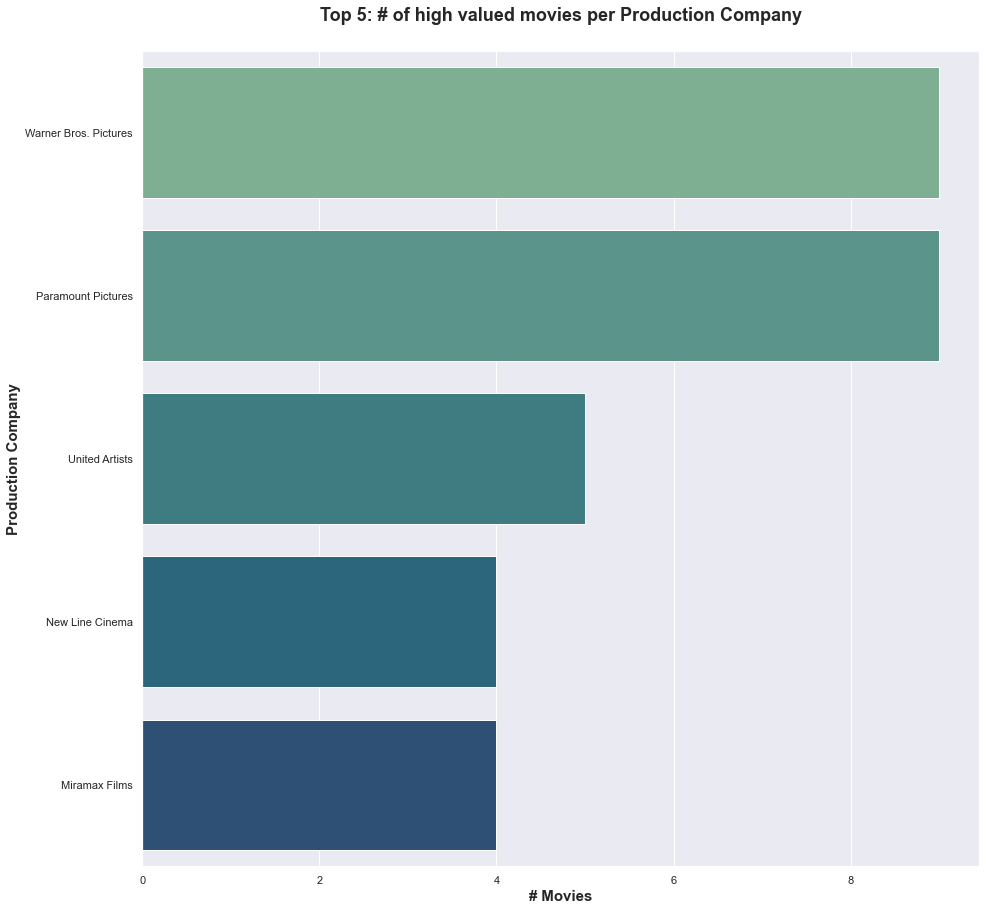

In [ ]:
eda.barplot_sns(production_company,"production_company","index","crest","Top 5: # of high valued movies per Production Company",'# Movies',"Production Company")

In [ ]:
directors_mov = full_table["directors"].value_counts().reset_index().sort_index().head(5)
directors_mov

,index,directors
0,Christopher Nolan,6
1,Quentin Tarantino,4
2,Alfred Hitchcock,4
3,Peter Jackson,3
4,Francis Ford Coppola,3


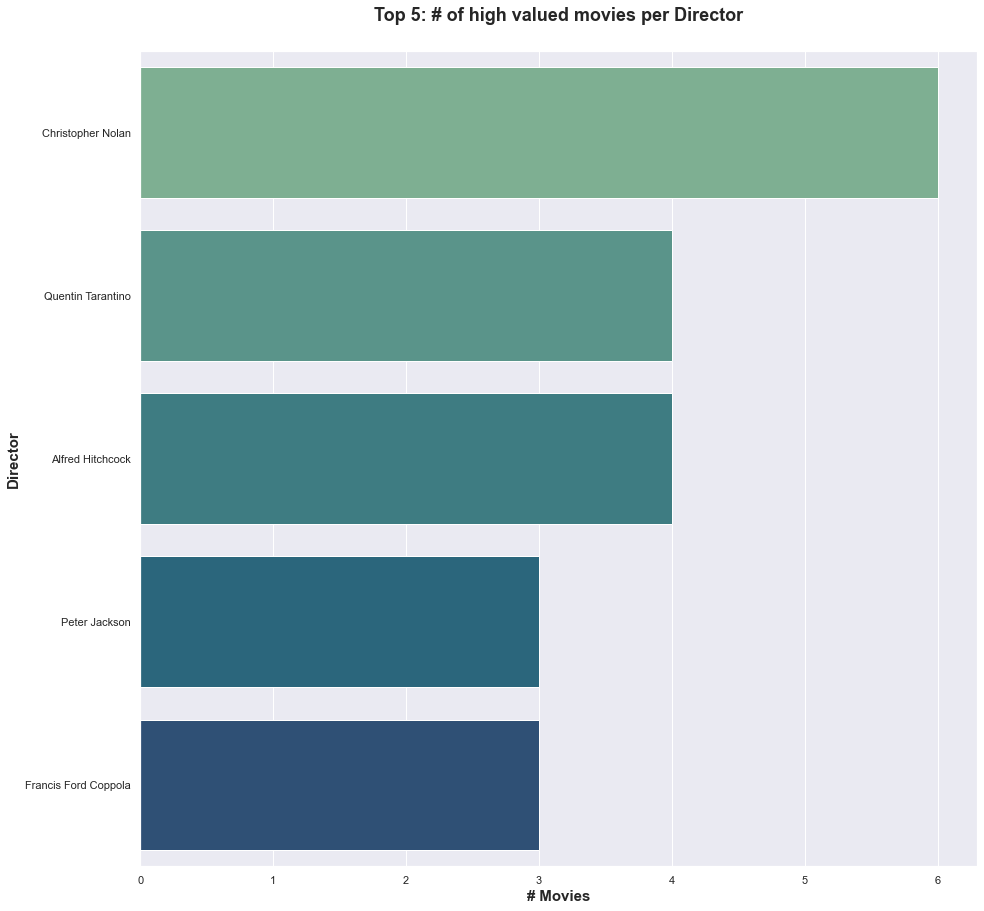

In [ ]:
eda.barplot_sns(directors_mov,"directors","index","crest","Top 5: # of high valued movies per Director",'# Movies',"Director")

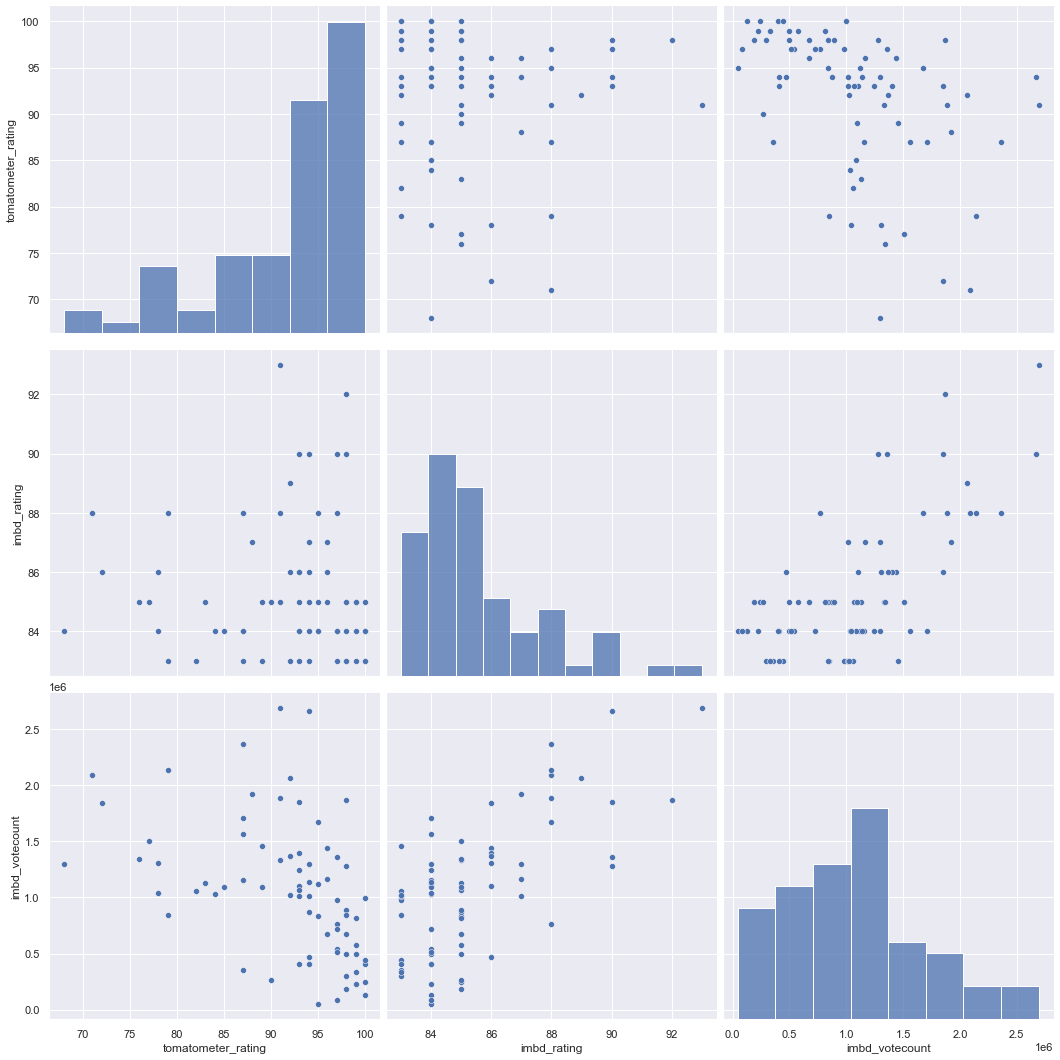

In [ ]:
sns.set(rc={'figure.figsize':(15,15)})
sns.pairplot(data = full_table, vars=['tomatometer_rating','imbd_rating','imbd_votecount'], height=5)


